In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features_matrix = np.load("./continents_new_features.npz")["arr_0"]
features_matrix.shape

(770, 10, 2)

In [3]:
flights_matrix = np.load("./continents_flight_zero_diag.npz")["arr_0"]
flights_matrix.shape

(999, 10, 10)

In [4]:
flights_matrix[200,0:5,0:5]

array([[7.5000e+01, 3.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00],
       [3.0000e+00, 2.5331e+04, 2.7000e+01, 3.1000e+01, 1.9000e+01],
       [3.0000e+00, 3.6000e+01, 4.2900e+02, 1.0000e+00, 0.0000e+00],
       [2.0000e+00, 2.7000e+01, 1.0000e+00, 1.5720e+03, 0.0000e+00],
       [0.0000e+00, 2.0000e+01, 0.0000e+00, 0.0000e+00, 4.4400e+02]])

In [5]:
continents = ["Africa", "North America", "South America", "Oceania", "Eastern Europe", "Western Europe", "Middle East", "South Asia", "Southeast-East Asia", "Central Asia"]

# Sync two matrices
March 1st, 2020 to September 30th, 2021

In [6]:
features_matrix[616,:,1]

array([ 13595., 136389.,  28620.,   2716.,  57621.,  89430.,  54579.,
        30943.,  68889.,   6377.])

In [7]:
flights_matrix[424,0:10,0:5]

array([[1.0200e+02, 6.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00],
       [6.0000e+00, 3.0786e+04, 7.9000e+01, 3.5000e+01, 2.2000e+01],
       [3.0000e+00, 7.1000e+01, 4.7000e+02, 1.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.5000e+01, 0.0000e+00, 2.4070e+03, 0.0000e+00],
       [0.0000e+00, 1.8000e+01, 0.0000e+00, 0.0000e+00, 4.9400e+02],
       [8.3000e+01, 5.1800e+02, 5.4000e+01, 1.0000e+00, 8.5500e+02],
       [1.5000e+01, 4.2000e+01, 2.0000e+00, 1.1000e+01, 9.7000e+01],
       [1.0000e+00, 1.2000e+01, 0.0000e+00, 3.0000e+00, 5.0000e+00],
       [2.0000e+00, 9.9000e+01, 1.0000e+00, 9.5000e+01, 1.2000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5000e+01]])

In [8]:
# Indexes in features matrix: 38 to 616
# Indexes in flights matrix: 424 to 998

synced_feature_matrix = features_matrix[38:616]
synced_flights_matrix = flights_matrix[424:998]

print(synced_feature_matrix.shape)
print(synced_flights_matrix.shape)

(578, 10, 2)
(574, 10, 10)


In [9]:
# Missing Day in Flight Matrix  -  Index of that day in features matrix, need to delete
# 3/14/2021 - 378
# 5/31/2021 - 456
# 9/4/2021 - 552
# 9/29/2021 - 577

In [10]:
synced_feature_matrix[577,:,1]

array([ 16022., 149501.,  24769.,   3224.,  52754.,  92285.,  51854.,
        28459.,  64094.,   7539.])

In [11]:
synced_feature_matrix = np.delete(synced_feature_matrix, [378, 456, 552, 577], axis=0)

In [12]:
print(synced_feature_matrix.shape)
print(synced_flights_matrix.shape)

(574, 10, 2)
(574, 10, 10)


# Visualize Outgoing, Incoming, and Combined Flights versus Days

In [31]:
def plot_flights_over_days(dataset_flight_matrix, flight_type):
    """
    This function plots a figure of outgoing edges for each country over each day of the dataset
    
    Args:
        - dataset_flight_matrix: Shape (dataset_len, 10, 10)
    """
    assert flight_type in ["Incoming", "Outgoing", "Combined"]
    
    if flight_type == "Outgoing":
        daywise_flights = np.nansum(dataset_flight_matrix, axis=1)
    elif flight_type == "Incoming":
        daywise_flights = np.nansum(dataset_flight_matrix, axis=2)
    elif flight_type == "Combined":
        daywise_flights = np.nansum(dataset_flight_matrix, axis=1) + np.nansum(dataset_flight_matrix, axis=2)

    country_dict = { continents[idx]: daywise_flights[:, idx] for idx in range(len(continents)) }
    country_dict["Day Index"] = list(range(len(daywise_flights)))
    visual_df = pd.DataFrame(country_dict)

    plt.figure(figsize=(18, 6), dpi=80)
    plt.rcParams.update({'font.size': 20})
    sns.lineplot(x='Day Index', y='Summed {} Flights'.format(flight_type), hue='Continent', data=pd.melt(visual_df, ['Day Index'], value_name='Summed {} Flights'.format(flight_type), var_name="Continent"))
    plt.title("Summed {} Flights Per Day".format(flight_type), fontsize=24)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    filename = "continents_v19_daywise_num_{}_flights".format(flight_type)
    plt.savefig("./" + filename + '.png', bbox_inches='tight', facecolor='white')
    plt.clf()
    plt.close()


In [32]:
plot_flights_over_days(synced_flights_matrix, flight_type="Outgoing")
plot_flights_over_days(synced_flights_matrix, flight_type="Incoming")
plot_flights_over_days(synced_flights_matrix, flight_type="Combined")

In [33]:
WINDOW_SIZE = 7
def plot_flights_over_rolling_windows(dataset_flight_matrix, flight_type):
    """
    This function plots a figure of outgoing edges for each country over each rolling window of the dataset
    
    Args:
        - dataset_flight_matrix: Shape (dataset_len, 10, 10)
    """
    assert flight_type in ["Incoming", "Outgoing", "Combined"]
    
    if flight_type == "Outgoing":
        daywise_flights = np.nansum(dataset_flight_matrix, axis=1)
    elif flight_type == "Incoming":
        daywise_flights = np.nansum(dataset_flight_matrix, axis=2)
    elif flight_type == "Combined":
        daywise_flights = np.nansum(dataset_flight_matrix, axis=1) + np.nansum(dataset_flight_matrix, axis=2)

    roll_win_flights = [daywise_flights[idx: idx+30+WINDOW_SIZE, :].mean(axis=0) for idx in range(len(daywise_flights) - 30 - WINDOW_SIZE - WINDOW_SIZE)]
    roll_win_flights = np.array(roll_win_flights)

    country_dict = { continents[idx]: roll_win_flights[:, idx] for idx in range(len(continents)) }
    country_dict["Rolling Window Index"] = list(range(len(roll_win_flights)))
    visual_df = pd.DataFrame(country_dict)

    plt.figure(figsize=(18, 6), dpi=80)
    plt.rcParams.update({'font.size': 20})
    sns.lineplot(x='Rolling Window Index', y='Total Number of {} Flights'.format(flight_type), hue='Country', data=pd.melt(visual_df, ['Rolling Window Index'], value_name='Total Number of {} Flights'.format(flight_type), var_name="Country"))
    plt.title("Total Number of {} Flights Per Rolling Window".format(flight_type), fontsize= 16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    filename = "continents_v19_roll_win_num_{}_flights".format(flight_type)
    plt.savefig("./" + filename + '.png', bbox_inches='tight', facecolor='white')
    plt.clf()
    plt.close()

In [34]:
plot_flights_over_rolling_windows(synced_flights_matrix, flight_type="Outgoing")
plot_flights_over_rolling_windows(synced_flights_matrix, flight_type="Incoming")
plot_flights_over_rolling_windows(synced_flights_matrix, flight_type="Combined")

# Check Node Features for nans, negatives, and prevalence of 0s

In [35]:
np.where(synced_feature_matrix == np.nan)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [36]:
np.where(synced_feature_matrix < 0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [37]:
np.where(synced_feature_matrix == 0)  # A few regions reported 0 overall cases in March 2020

(array([ 0,  1,  1,  2,  2,  3,  5,  6, 11, 84]),
 array([7, 2, 9, 7, 9, 9, 9, 0, 3, 3]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

# Check Flight Matrix For Zero

In [38]:
flight_zeros_loc = np.where(synced_flights_matrix == 0)
len(flight_zeros_loc[0])

18232

In [39]:
flight_zeros_loc

(array([  0,   0,   0, ..., 573, 573, 573]),
 array([0, 0, 1, ..., 9, 9, 9]),
 array([7, 9, 9, ..., 7, 8, 9]))

If want to test fully connected adjacency, run this cell

In [40]:
# synced_flights_matrix += 10

In [41]:
# flight_zeros_loc = np.where(synced_flights_matrix == 0)
# flight_zeros_loc

# Remove self-connections in flight matrix

In [42]:
synced_flights_matrix.shape

(574, 10, 10)

In [43]:
for idx in range(10):
    synced_flights_matrix[:,idx,idx] = 0

In [44]:
flight_zeros_loc = np.where(synced_flights_matrix == 0)
print(len(flight_zeros_loc[0]))

23854


In [45]:
synced_flights_matrix[100,:5,:5]

array([[ 0.,  0.,  2.,  0.,  0.],
       [ 1.,  0., 25.,  5.,  7.],
       [ 1., 20.,  0.,  0.,  0.],
       [ 0.,  8.,  0.,  0.,  0.],
       [ 1.,  9.,  0.,  0.,  0.]])

Reset variable names

In [46]:
feature_matrix = synced_feature_matrix
flights_matrix = synced_flights_matrix

print(feature_matrix.shape)
print(flights_matrix.shape)

(574, 10, 2)
(574, 10, 10)


# Smoothen Covid Cases Feature

Visualize covid cases before smoothening

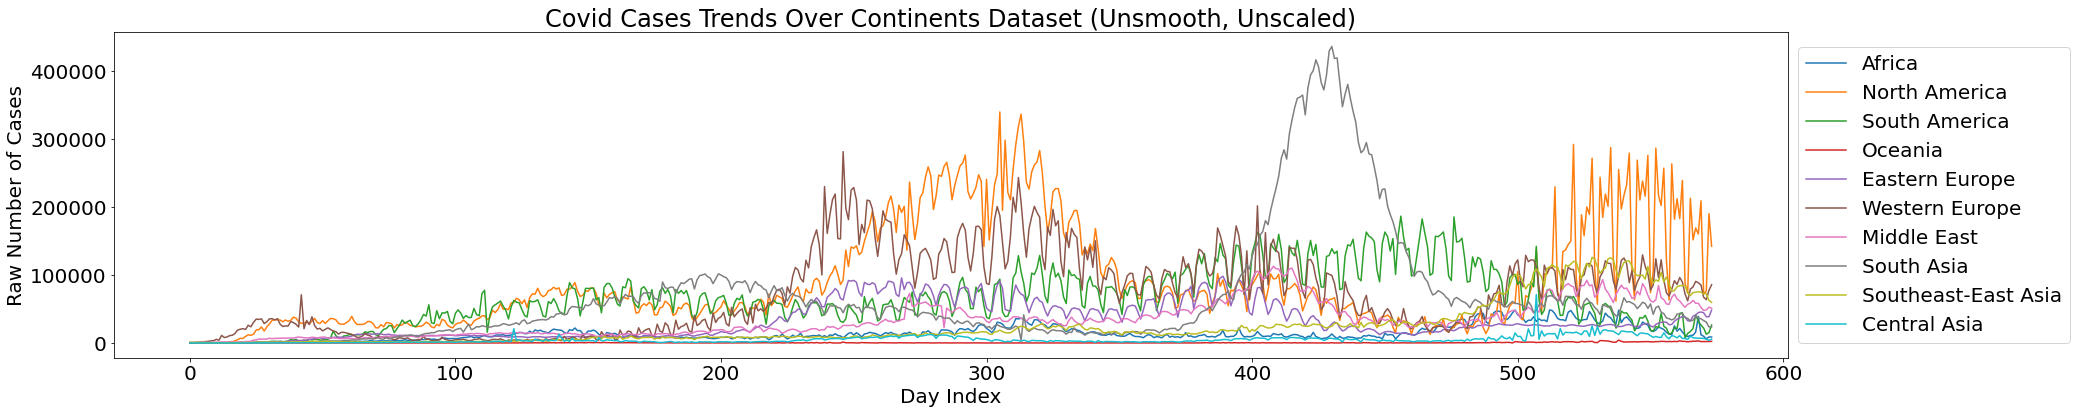

In [47]:
plt.figure(figsize=(30,6))
plt.rcParams.update({'font.size': 20})
plt.plot(feature_matrix[:, 0, 1], label=continents[0])
plt.plot(feature_matrix[:, 1, 1], label=continents[1])
plt.plot(feature_matrix[:, 2, 1], label=continents[2])
plt.plot(feature_matrix[:, 3, 1], label=continents[3])
plt.plot(feature_matrix[:, 4, 1], label=continents[4])
plt.plot(feature_matrix[:, 5, 1], label=continents[5])
plt.plot(feature_matrix[:, 6, 1], label=continents[6])
plt.plot(feature_matrix[:, 7, 1], label=continents[7])
plt.plot(feature_matrix[:, 8, 1], label=continents[8])
plt.plot(feature_matrix[:, 9, 1], label=continents[9])
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Raw Number of Cases")
plt.title("Covid Cases Trends Over Continents Dataset (Unsmooth, Unscaled)", fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./continents_v19_ncases_trend_unsmooth_unscaled.png", bbox_inches='tight', facecolor='white')
plt.show()

In [48]:
feature_matrix_smooth = np.copy(feature_matrix)
feature_matrix_smooth.shape

(574, 10, 2)

(567, 10, 2)


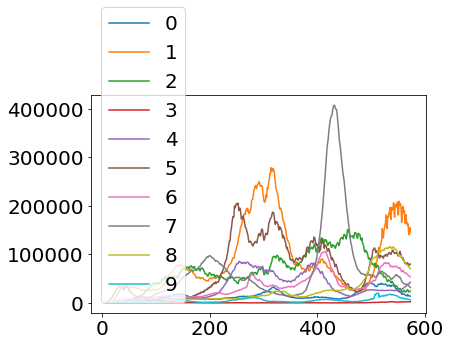

In [49]:
# Smoothen Entire Dataset
window = 7
log10_feature_matrix_df = pd.DataFrame(feature_matrix[:,:,1])
rolling_win_df = log10_feature_matrix_df.rolling(window=window + 1).mean()
rolling_win_df.dropna(inplace=True)
rolling_win_df.plot()
rolling_win_df_np = rolling_win_df.values

# Delete first window from feature and flight datasets
feature_matrix = feature_matrix[window:,:,:]
feature_matrix_smooth = feature_matrix_smooth[window:,:,:]
flights_matrix = flights_matrix[window:,:,:]

# Overlay moving averages onto matrix that will be saved
feature_matrix_smooth[:,:,1] = rolling_win_df_np
print(feature_matrix_smooth.shape)

Visualize Covid Cases after smoothening

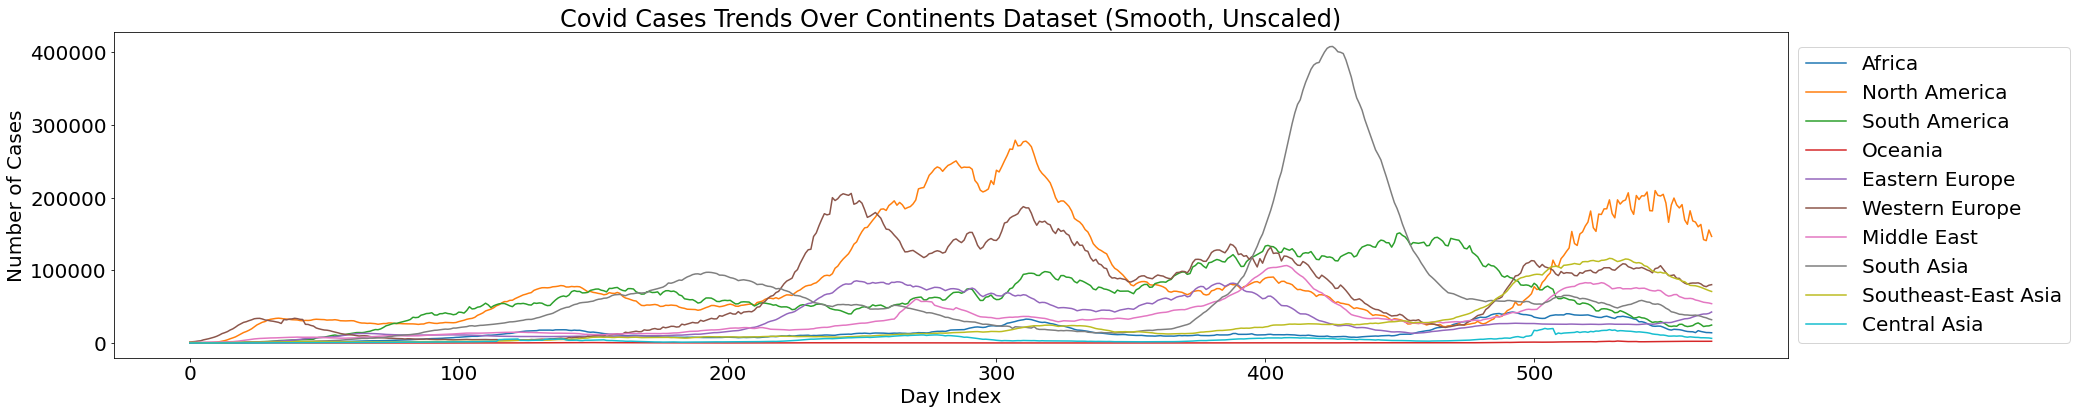

In [51]:
plt.figure(figsize=(30,6))
plt.plot(feature_matrix_smooth[:, 0, 1], label=continents[0])
plt.plot(feature_matrix_smooth[:, 1, 1], label=continents[1])
plt.plot(feature_matrix_smooth[:, 2, 1], label=continents[2])
plt.plot(feature_matrix_smooth[:, 3, 1], label=continents[3])
plt.plot(feature_matrix_smooth[:, 4, 1], label=continents[4])
plt.plot(feature_matrix_smooth[:, 5, 1], label=continents[5])
plt.plot(feature_matrix_smooth[:, 6, 1], label=continents[6])
plt.plot(feature_matrix_smooth[:, 7, 1], label=continents[7])
plt.plot(feature_matrix_smooth[:, 8, 1], label=continents[8])
plt.plot(feature_matrix_smooth[:, 9, 1], label=continents[9])
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Number of Cases")
plt.title("Covid Cases Trends Over Continents Dataset (Smooth, Unscaled)", fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./continents_v19_ncases_trend_smooth_unscaled.png", bbox_inches='tight', facecolor='white')
plt.show()

# Log Transform Covid Cases and Containment Index Features
Do all log transformations after moving average smoothening

In [52]:
for i in range(feature_matrix[:,:,1].shape[0]):
    for j in range(feature_matrix[:,:,1].shape[1]):
        if feature_matrix[i][j][1] > 0:
            feature_matrix[i][j][1] = np.log10(feature_matrix[i][j][1])
        feature_matrix[i][j][0] = np.log10(feature_matrix[i][j][0])

feature_matrix[:,:,1].shape

(567, 10)

In [53]:
for i in range(feature_matrix_smooth[:,:,1].shape[0]):
    for j in range(feature_matrix_smooth[:,:,1].shape[1]):
        if feature_matrix_smooth[i][j][1] > 0:
            feature_matrix_smooth[i][j][1] = np.log10(feature_matrix_smooth[i][j][1])
        feature_matrix_smooth[i][j][0] = np.log10(feature_matrix_smooth[i][j][0])

feature_matrix_smooth[:,:,1].shape

(567, 10)

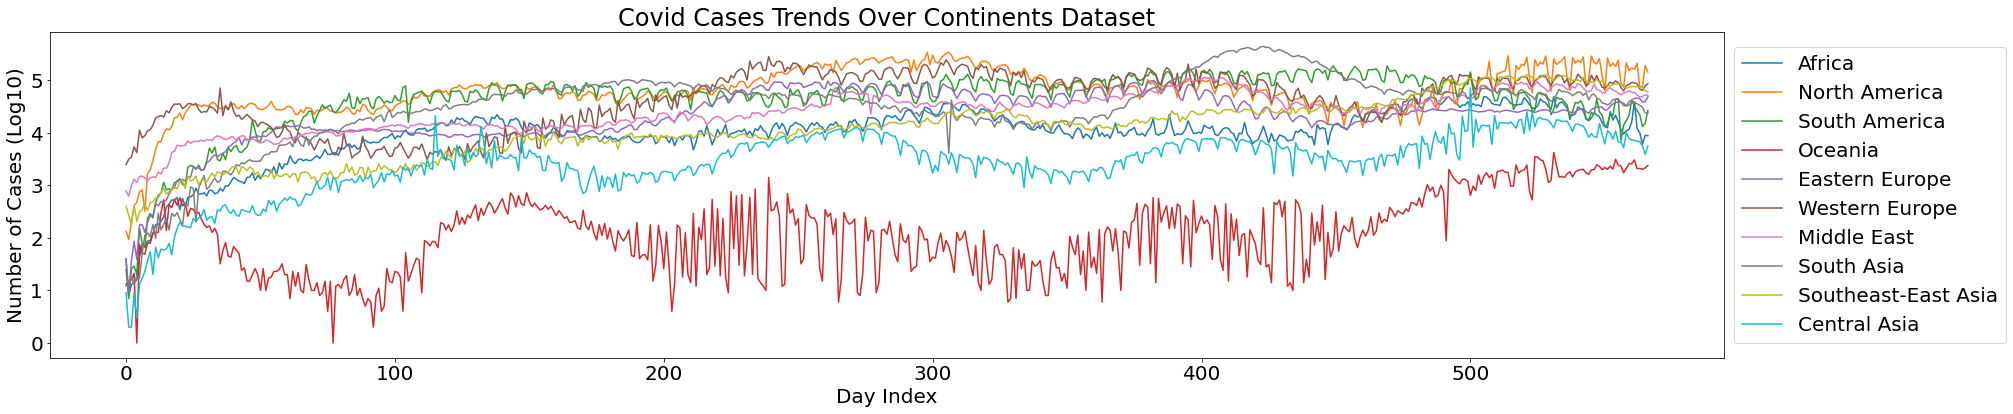

In [55]:
plt.figure(figsize=(30,6))
plt.plot(feature_matrix[:, 0, 1], label=continents[0])
plt.plot(feature_matrix[:, 1, 1], label=continents[1])
plt.plot(feature_matrix[:, 2, 1], label=continents[2])
plt.plot(feature_matrix[:, 3, 1], label=continents[3])
plt.plot(feature_matrix[:, 4, 1], label=continents[4])
plt.plot(feature_matrix[:, 5, 1], label=continents[5])
plt.plot(feature_matrix[:, 6, 1], label=continents[6])
plt.plot(feature_matrix[:, 7, 1], label=continents[7])
plt.plot(feature_matrix[:, 8, 1], label=continents[8])
plt.plot(feature_matrix[:, 9, 1], label=continents[9])
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Number of Cases (Log10)")
plt.title("Covid Cases Trends Over Continents Dataset", fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./continents_v19_ncases_trend_unsmooth_log10.png", bbox_inches='tight', facecolor='white')
plt.show()

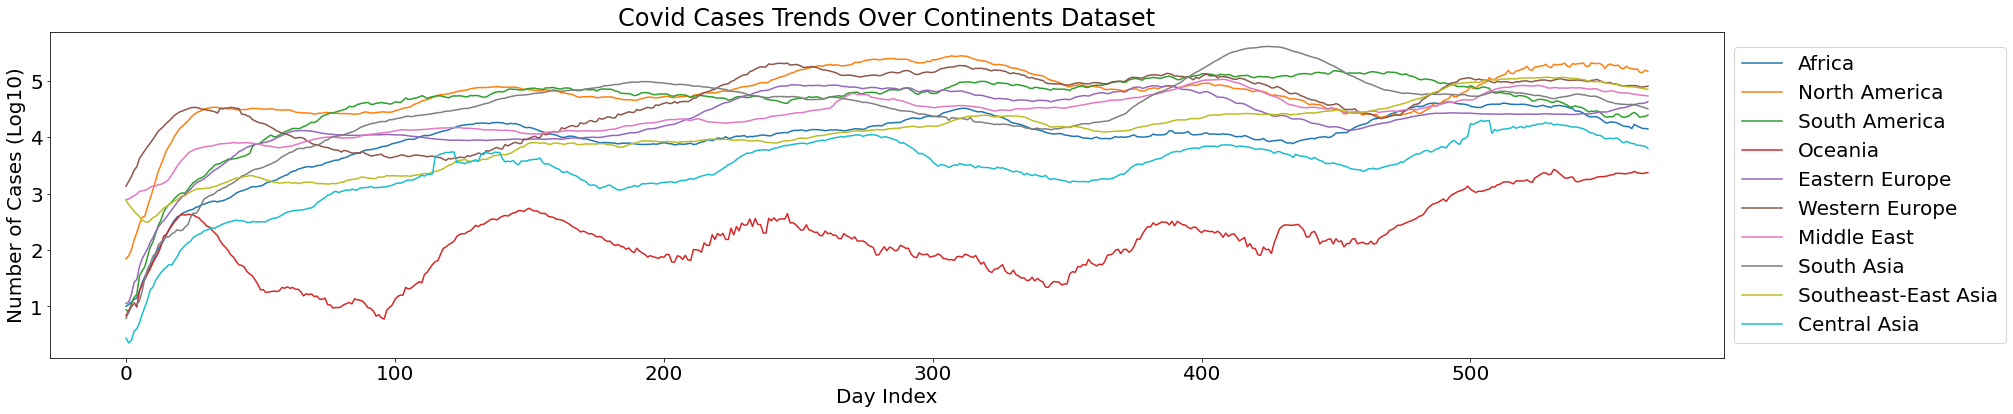

In [56]:
plt.figure(figsize=(30,6))
plt.plot(feature_matrix_smooth[:, 0, 1], label=continents[0])
plt.plot(feature_matrix_smooth[:, 1, 1], label=continents[1])
plt.plot(feature_matrix_smooth[:, 2, 1], label=continents[2])
plt.plot(feature_matrix_smooth[:, 3, 1], label=continents[3])
plt.plot(feature_matrix_smooth[:, 4, 1], label=continents[4])
plt.plot(feature_matrix_smooth[:, 5, 1], label=continents[5])
plt.plot(feature_matrix_smooth[:, 6, 1], label=continents[6])
plt.plot(feature_matrix_smooth[:, 7, 1], label=continents[7])
plt.plot(feature_matrix_smooth[:, 8, 1], label=continents[8])
plt.plot(feature_matrix_smooth[:, 9, 1], label=continents[9])
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Number of Cases (Log10)")
plt.title("Covid Cases Trends Over Continents Dataset", fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./continents_v19_ncases_trend_smooth_log10.png", bbox_inches='tight', facecolor='white')
plt.show()

# Plot Containment Index

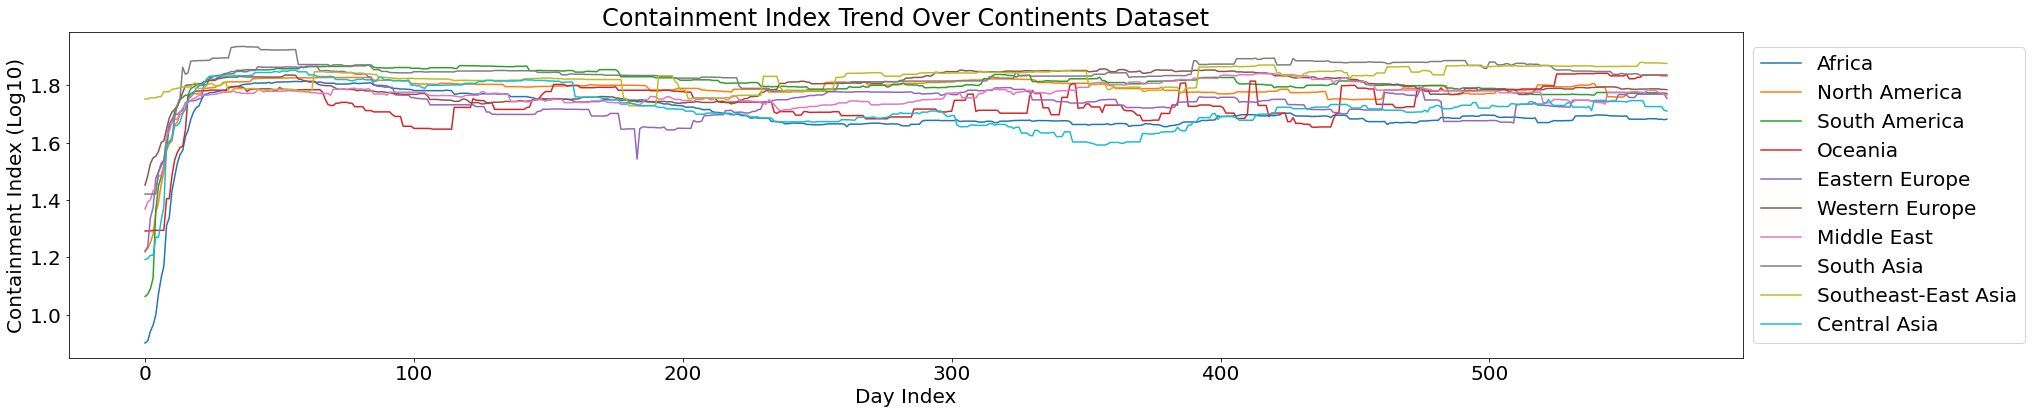

In [57]:
plt.figure(figsize=(30,6))
plt.plot(feature_matrix[:, 0, 0], label=continents[0])
plt.plot(feature_matrix[:, 1, 0], label=continents[1])
plt.plot(feature_matrix[:, 2, 0], label=continents[2])
plt.plot(feature_matrix[:, 3, 0], label=continents[3])
plt.plot(feature_matrix[:, 4, 0], label=continents[4])
plt.plot(feature_matrix[:, 5, 0], label=continents[5])
plt.plot(feature_matrix[:, 6, 0], label=continents[6])
plt.plot(feature_matrix[:, 7, 0], label=continents[7])
plt.plot(feature_matrix[:, 8, 0], label=continents[8])
plt.plot(feature_matrix[:, 9, 0], label=continents[9])
plt.legend()
plt.xlabel("Day Index")
plt.ylabel("Containment Index (Log10)")
plt.title("Containment Index Trend Over Continents Dataset", fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./continents_v19_containment_idx_trend_log10.png", bbox_inches='tight', facecolor='white')
plt.show()

# Log10 Scale Adjacency Matrix

In [58]:
# First save unscaled flight matrix
unscaled_flight_matrix = np.copy(flights_matrix)
print(unscaled_flight_matrix.shape)

(567, 10, 10)


In [59]:
print(unscaled_flight_matrix.max())
print(unscaled_flight_matrix.min())
print(unscaled_flight_matrix.mean())

897.0
0.0
27.422169312169313


In [60]:
flight_zeros_loc = np.where(unscaled_flight_matrix == 0)
print(len(flight_zeros_loc[0]))

23642


In [61]:
unscaled_flight_matrix[0]

array([[  0.,   7.,   2.,   0.,   0., 141.,  21.,   1.,   2.,   0.],
       [  9.,   0., 105.,  40.,  23., 491.,  34.,  12., 103.,   0.],
       [  2., 122.,   0.,   0.,   0.,  62.,   3.,   0.,   0.,   0.],
       [  2.,  33.,   1.,   0.,   0.,   4.,  21.,   2.,  97.,   0.],
       [  0.,  18.,   0.,   0.,   0., 834.,  72.,   6.,  12.,  26.],
       [ 87., 477.,  64.,   1., 865.,   0., 278.,  38., 114.,   5.],
       [ 14.,  31.,   2.,  13.,  74., 292.,   0., 135.,  59.,  12.],
       [  0.,  13.,   0.,   2.,   6.,  48., 144.,   0.,  86.,   2.],
       [  0., 106.,   0.,  77.,  16.,  90.,  71.,  84.,   0.,   4.],
       [  0.,   0.,   0.,   0.,  22.,   9.,   9.,   2.,   4.,   0.]])

In [62]:
# Scaling by log10 transformation now
# Important: Replace 1 flights with 1.1, so that log of 1 does not introduce more zeros in dataset. This affects adjacency.
flights_matrix[flights_matrix == 1] = 1.1
for roll_win in range(len(flights_matrix)):
    for row_idx in range(len(flights_matrix[roll_win])):
        for col_idx in range(len(flights_matrix[roll_win][row_idx])):
            if flights_matrix[roll_win][row_idx][col_idx] > 0:
                flights_matrix[roll_win][row_idx][col_idx] = np.log10(flights_matrix[roll_win][row_idx][col_idx])

In [63]:
flight_zeros_loc = np.where(flights_matrix == 0)
print(len(flight_zeros_loc[0]))

23642


In [64]:
print(flights_matrix.max())
print(flights_matrix.min())
print(flights_matrix.mean())

2.952792443044092
0.0
0.6702925342521777


Visualize flights on log10 scale again after log10 scaling

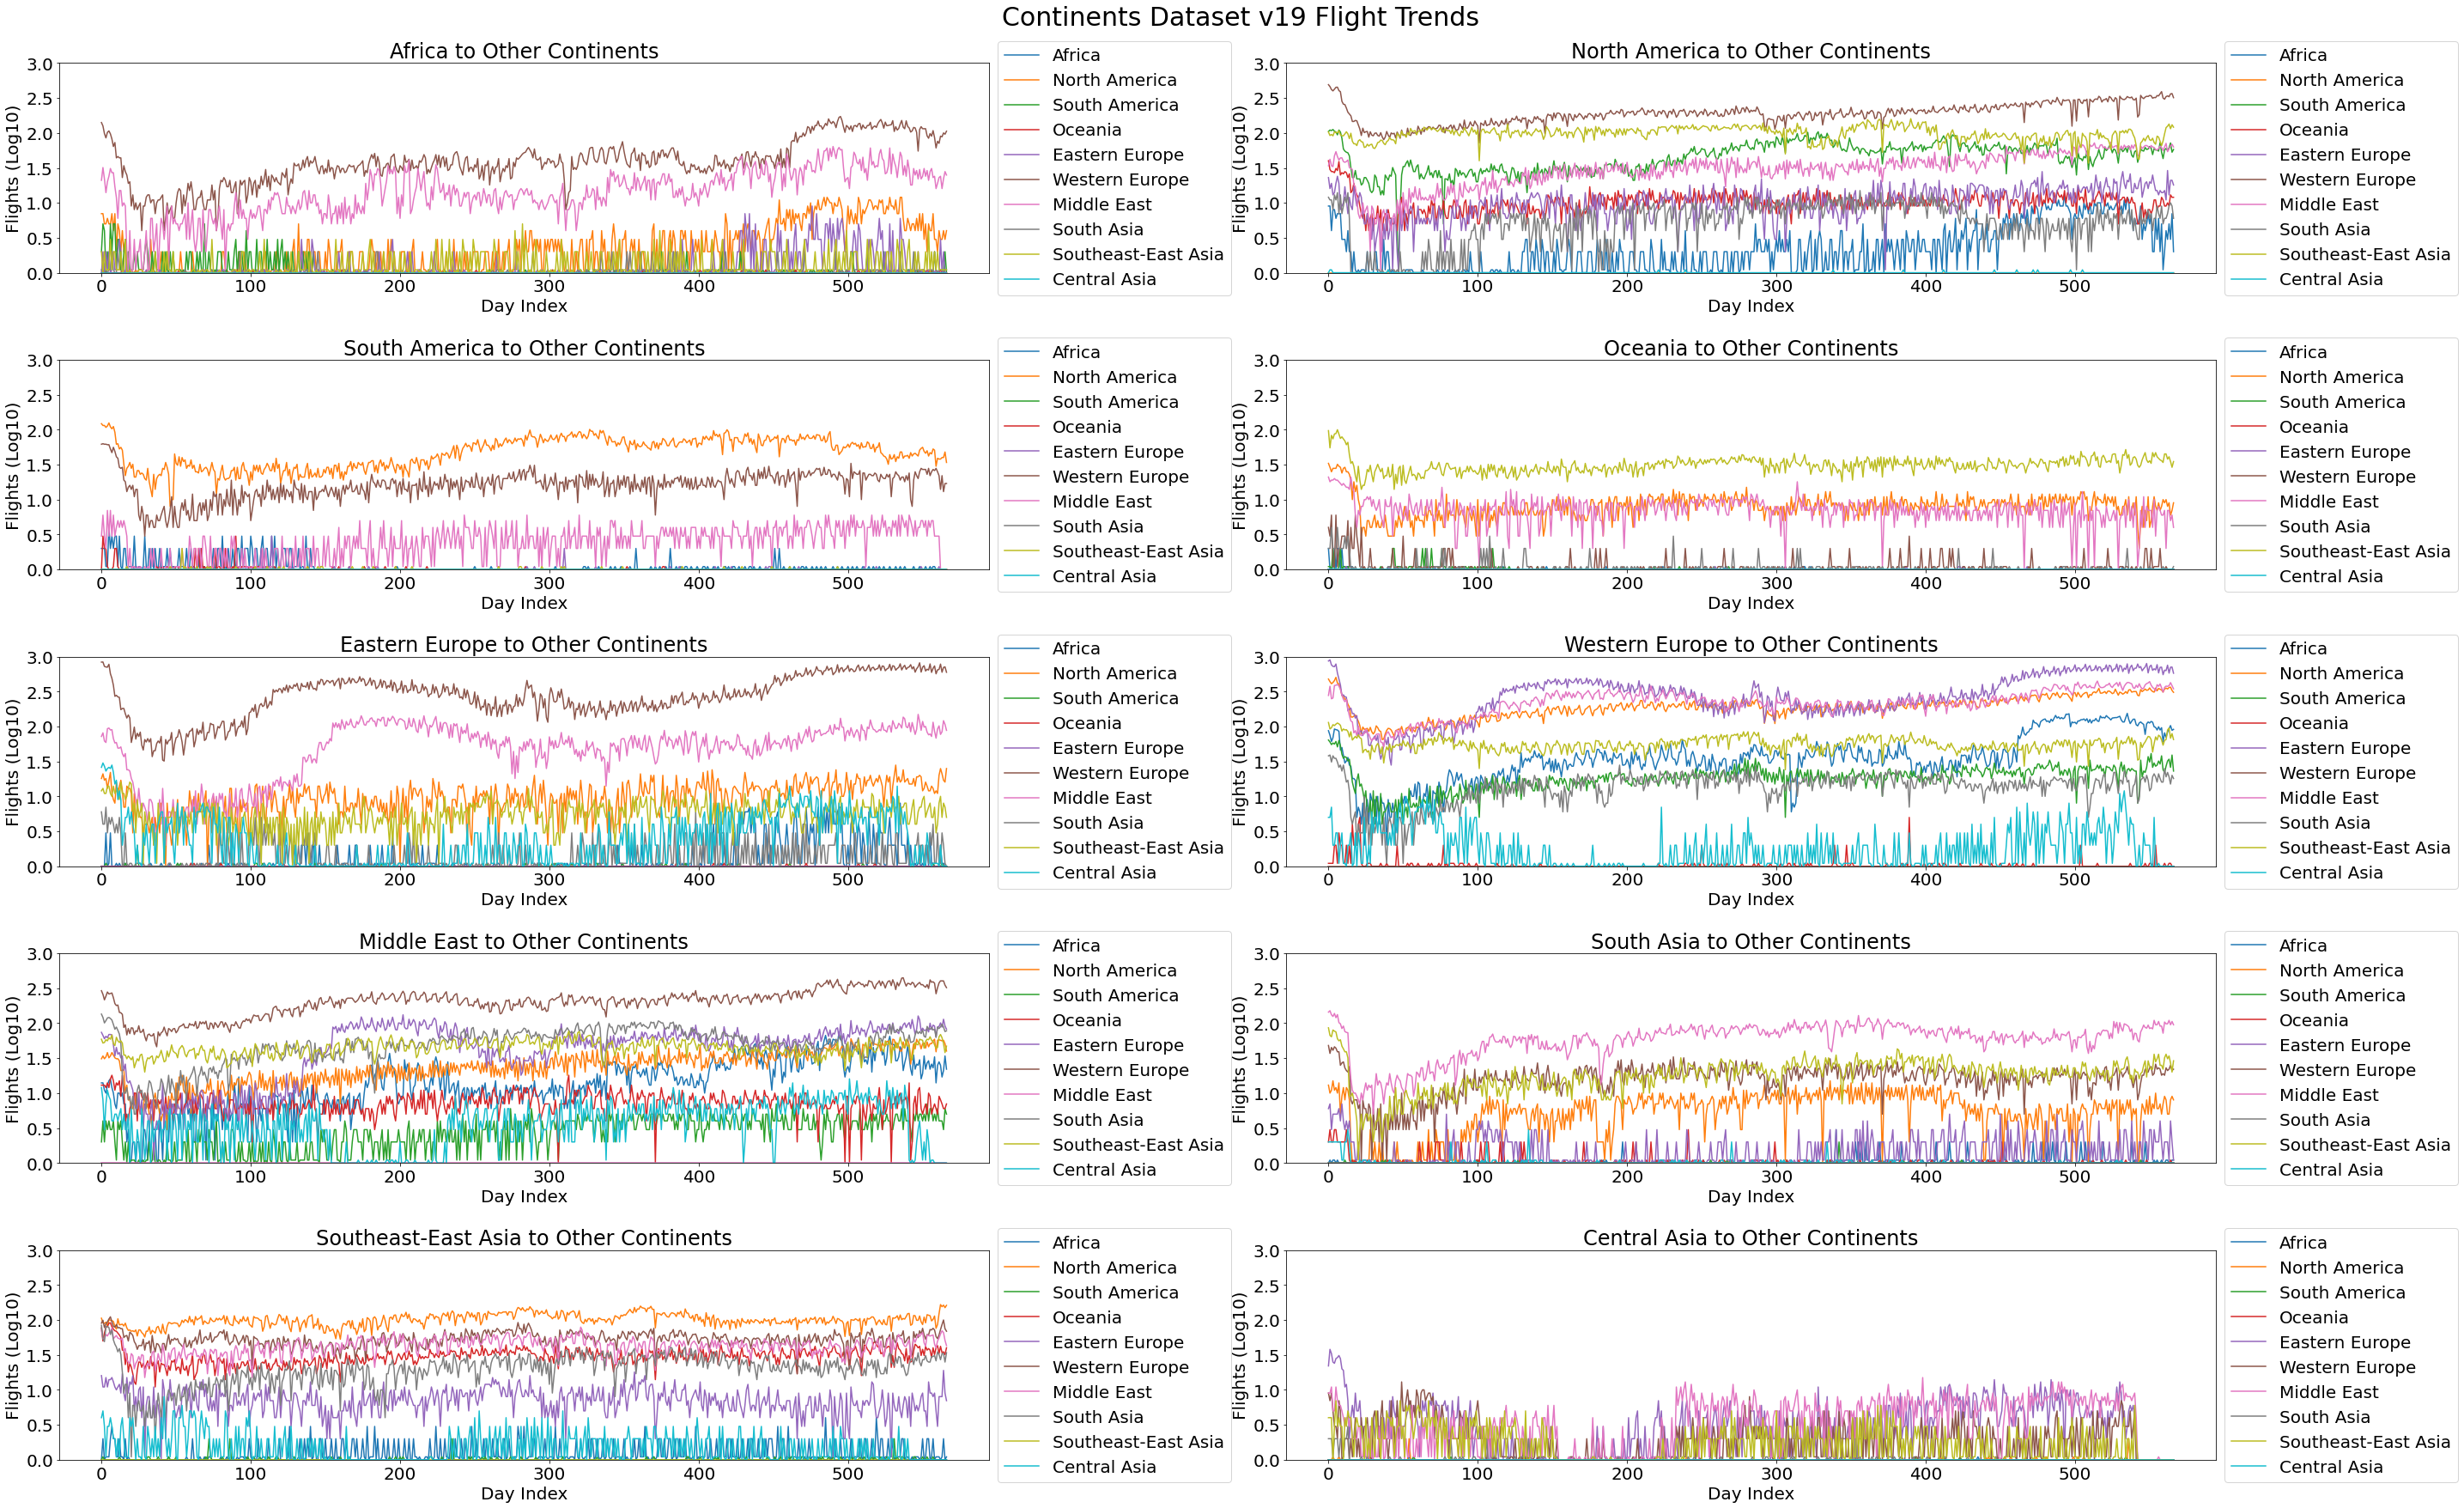

In [74]:
sns.reset_orig()
plt.figure(figsize=(40, 25))
plt.rcParams.update({'font.size': 20})
for j in range(10):
    ax = plt.subplot(5,2,j+1)
    for i in range(10):
        if i != j:
            plt.plot(flights_matrix[:,j,i], label=continents[i])
        else:
            plt.plot(np.zeros((len(flights_matrix))), label=continents[i])
    plt.title(continents[j] + " to Other Continents", fontsize=24)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0.0, 3.0)
    plt.xlabel('Day Index')
    plt.ylabel('Flights (Log10)')

plt.suptitle("Continents Dataset v19 Flight Trends", fontsize=30)
plt.tight_layout()
plt.savefig("./continents_v19_flight_trends_log10.png", facecolor="white", bbox_inches="tight")

# Save Dataset

In [46]:
print(feature_matrix.shape)
print(feature_matrix_smooth.shape)
print(flights_matrix.shape)
print(unscaled_flight_matrix.shape)

(567, 10, 2)
(567, 10, 2)
(567, 10, 10)
(567, 10, 10)


In [47]:
print(unscaled_flight_matrix.max())
print(unscaled_flight_matrix.min())
print(unscaled_flight_matrix.mean())
print(flights_matrix.max())
print(flights_matrix.min())
print(flights_matrix.mean())

897.0
0.0
27.422169312169313
2.952792443044092
0.0
0.6702925342521777


In [48]:
flights_matrix[440,5:,5:]

array([[0.        , 2.27184161, 1.07918125, 1.72427587, 0.04139269],
       [2.41664051, 0.        , 1.69019608, 1.63346846, 0.84509804],
       [1.04139269, 1.62324929, 0.        , 1.23044892, 0.        ],
       [1.74036269, 1.59106461, 1.36172784, 0.        , 0.04139269],
       [0.30103   , 0.69897   , 0.        , 0.        , 0.        ]])

In [49]:
np.savez('./10_continents_dataset_v19_node_pert',
    feature_matrix_smooth = feature_matrix_smooth,
    feature_matrix_unsmooth = feature_matrix,
    flight_matrix_unscaled = unscaled_flight_matrix,
    flight_matrix_log10_scaled = flights_matrix,
)